
# 2.0`About Author` 
| Attribute   | Details                                                                                                                                                  |
|-------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Author**  | **`Muhammad Bilal RAMZAN`**                                                                                                                                     |
| **Kaggle**  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/)                    |
| **LinkedIn**| [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/bilal-ramzan/)|
| **Email**   | [![Email Badge](https://img.shields.io/badge/Email-D14836?style=for-the-badge&logo=gmail&logoColor=white)](mailto:mianb0062@gmail.com)                    |


# 2.1` ABOUT DATA`:
| **Attribute**         | **Description**                                    |
|-----------------------|----------------------------------------------------|
| **DATA**              | `CAR_PRICE_PREDICTION_DATA`                       |
| **Code Submission**          | `24-September-2024` ` |
| **DATA LINK**         | [DATA🔗](https://www.kaggle.com/competitions/playground-series-s4e9/data)  |


# 2.2 `Task Overview`:
***We are going to perform a machine learning project to predict the price of cars using the provided dataset. The main objective is to develop a predictive model that accurately estimates car prices based on various features such as brand, model, year,fuel type, and other relevant attributes. The analysis will focus on data preprocessing, feature selection, model training, and validation to ensure that we build a reliable and effective predictive model.***


# 2.3 Goals:
1. **Data Preprocessing**: Clean the dataset by handling missing values and outliers to prepare it for modeling.
2. **Feature Engineering**: Select and transform relevant features to improve the model's predictive power.
3. **Model Selection and Training**: Choose an appropriate machine learning algorithm to train the model using the training dataset.
4. **Model Evaluation**: Assess the model’s performance using metrics such as Mean Squared Error (MSE) on a validation set.
5. **Price Prediction**: Use the trained model to predict car prices on the test dataset.
6. **Submission Preparation**: Generate a submission file in the required format for evaluation.


# 2.4 `Overview of Datasets for Car Price Prediction`:
1. **`train.csv`**:
   - **Description**: This is the training dataset used to build the predictive model. It contains various features related to cars, and the target variable is the `price`, which is continuous. The model will learn from this dataset to understand the relationship between the features and the price of the cars.
   - **Key Columns**:
     - `price`: The continuous target variable representing the price of the car.

2. **`test.csv`**:
   - **Description**: This dataset is used to evaluate the performance of the trained model. It contains the same features as the training dataset, but it does not include the `price` column. The objective is to predict the `price` for each row in this dataset using the trained model.
   - **Key Columns**: Same as the training dataset, except for the `price` column.

3. **`sample_submission.csv`**:
   - **Description**: This file serves as a template for the submission of predictions made on the test dataset. It contains the required format for submitting predicted prices, allowing you to see how your predictions should be structured.
   - **Key Columns**:
     - `Id`: An identifier for each row in the test dataset.
     - `price`: The predicted price values that you will generate using your model.



   # 2.5   WE ARE PEFOAM A REGRESSION TASK ON PRIDICT CAR PRICE

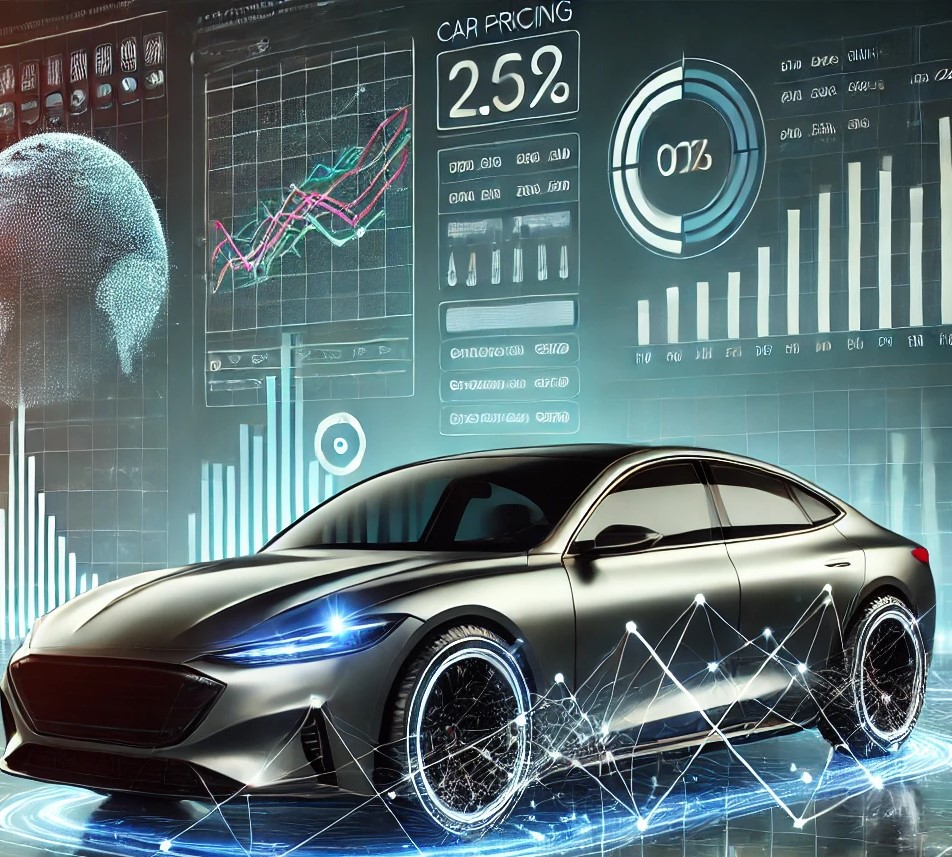


# 2.6 `Import Libraries`

In [1]:
# Import necessary libraries
import os
import re
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

# Preprocessing and feature engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Model selection and evaluation
from sklearn.experimental import enable_halving_search_cv  # Add this line
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingRandomSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
import lightgbm as lgb

# Model optimization
import optuna
from optuna.samplers import TPESampler
from lightgbm import early_stopping, log_evaluation

# Pipeline utilities
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Ignore warnings
warnings.filterwarnings('ignore')


# 2.7 `Load Dataset`

In [2]:

train_data  = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test_data  = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
sample_submission=pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')


# 2.8 `Check The Statistical Information Of Train And Test Dataset`:

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


## **Conclusion_1:**
AS YOU CAN SEE IN THE DATA SET WE HAVE TO MUCH COILUMN THAT ARE INI OR FLOT FOAM BUT THEY ACTUAL NATURE IS CATAGORICAL :
### **Categorical Columns** (non-numeric values):
- `brand` (e.g., "MINI", "Lincoln", "Chevrolet")
- `model` (e.g., "Cooper S Base", "LS V8")
- `fuel_type` (e.g., "Gasoline", "E85 Flex Fuel")
- `transmission` (e.g., "A/T", "Transmission w/Dual Shift Mode")
- `ext_col` (exterior color, e.g., "Yellow", "Black")
- `int_col` (interior color, e.g., "Gray", "Beige")
- `accident` (e.g., "None reported", "At least 1 accident or damage reported")
- `clean_title` (binary categorical, e.g., "Yes", "No")

### **Numerical Columns** (numeric values):
- `id` (e.g., 0, 1, 2)
- `model_year` (e.g., 2007, 2002)
- `milage` (e.g., 213000, 143250)
- `engine` (e.g., "172.0HP 1.6L 4 Cylinder Engine" can be converted to numerical features like horsepower and engine size if needed)
- `price` (e.g., 4200, 4999)

#### **Notes**: we only change the type of clean_title and ext_col to beacuse they have litlie bit missing value catagorical column impute by only .

In [4]:
# Convert specific integer columns to categorical type
# List of integer columns to treat as categorical
int_categorical_cols = ['accident', 'clean_title','fuel_type']

# Convert to categorical type
for col in int_categorical_cols:
    train_data[col] = train_data[col].astype('category')
    

# Check the updated data types
print("Updated Data Types:\n", train_data.dtypes)


Updated Data Types:
 id                 int64
brand             object
model             object
model_year         int64
milage             int64
fuel_type       category
engine            object
transmission      object
ext_col           object
int_col           object
accident        category
clean_title     category
price              int64
dtype: object


# 2.9 `Check The Data Types Of Train  Columns`

In [5]:
catagorical_count=train_data.select_dtypes(include=('category' )).shape[1]
float_count=train_data.select_dtypes(include=('float64')).shape[1]
int_count=train_data.select_dtypes(include=('int64')).shape[1]
print(f"catagorical_columns:{catagorical_count}")
print(f"float_column:{float_count}")
print(f"int_column:{int_count}")

catagorical_columns:3
float_column:0
int_column:4


In [6]:
print(f"Train Data Shape: {train_data.shape}")




Train Data Shape: (188533, 13)


## **Conclusion_2**:
- We Have 188533 Rows And 13 Columns In Train Dataset
  

# 3.0 PERFOAM BINNING IN DATASET AND IMPUTE MISSING VALUE

In [7]:
# Binning model year into five categories: Vintage, Old, Mid-Age, New, Latest
train_data['model_year_bins'] = pd.cut(train_data['model_year'], 
                                       bins=[1950, 1990, 2000, 2010, 2015, 2024], 
                                       labels=['Vintage', 'Old', 'Mid-Age', 'New', 'Latest'])

# Checking the distribution of the new binned column
print(train_data['model_year_bins'].value_counts())


model_year_bins
Latest     117039
New         38960
Mid-Age     30218
Old          2304
Vintage        12
Name: count, dtype: int64


In [8]:
# Binning mileage into categories
train_data['mileage_bins'] = pd.cut(train_data['milage'], bins=3, labels=['Low', 'Medium', 'High'])

# Visualizing the new mileage bins



In [9]:
# Define a function to extract relevant information from the 'engine' column
def extract_data_from_engine(df):
    # Create a copy of the DataFrame to avoid modifying the original
    df = df.copy()
    
    # Extract Horsepower from the 'engine' column using a regex pattern
    # The pattern looks for digits followed by 'HP'
    df['Horsepower'] = df['engine'].str.extract(r'(\d+\.\d+)(?=HP)').astype(float)
    
    # Extract Engine Size from the 'engine' column
    # The pattern looks for digits followed by 'L' or 'Liter'
    df['Engine_Size'] = df['engine'].str.extract(r'(\d+\.\d+)(?=L|Liter)').astype(float)
    
    # Extract the number of Cylinders from the 'engine' column
    # The pattern looks for digits followed by 'Cylinder', 'Vx', or 'Straight'
    df['Cylinders'] = df['engine'].str.extract(r'(\d+)\s(Cylinder|V\d|Straight)')[0].astype(float)
    
    return df  # Return the modified DataFrame

# Apply the function to extract engine-related data from train_data
train_data = extract_data_from_engine(train_data)

# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer

# Define a function to clean the DataFrame by imputing missing values
def cleaning_data(df):
    # Create an imputer object with the strategy to fill missing values with the most frequent value
    imputer = SimpleImputer(strategy='most_frequent')
    
    # Impute missing values in the 'fuel_type' column
    df['fuel_type'] = imputer.fit_transform(df[['fuel_type']]).ravel() 
    
    # Impute missing values in the 'Horsepower' column
    df['Horsepower'] = imputer.fit_transform(df[['Horsepower']]).ravel()
    
    # Impute missing values in the 'Engine_Size' column
    df['Engine_Size'] = imputer.fit_transform(df[['Engine_Size']]).ravel()
    
    # Impute missing values in the 'Cylinders' column
    df['Cylinders'] = imputer.fit_transform(df[['Cylinders']]).ravel()
    
    # Impute missing values for the 'accident' and 'clean_title' columns
    df[['accident', 'clean_title']] = imputer.fit_transform(df[['accident', 'clean_title']])
    
    return df  # Return the cleaned DataFrame

# Apply the cleaning_data function to the train_data DataFrame
train_data = cleaning_data(train_data)


In [10]:
# Define a function to extract the fuel type from engine information
def extract_fuel_type(engine_info):
    # Check if the engine_info is NaN (missing value)
    if pd.isna(engine_info):
        return np.nan  # If it is NaN, return NaN
    # Check if 'Gasoline' is in the engine_info string
    if 'Gasoline' in engine_info:
        return 'Gasoline'  # Return 'Gasoline' if found
    # Check if 'Hybrid' is in the engine_info string
    elif 'Hybrid' in engine_info:
        return 'Hybrid'  # Return 'Hybrid' if found
    # Check if 'Diesel' is in the engine_info string
    elif 'Diesel' in engine_info:
        return 'Diesel'  # Return 'Diesel' if found
    # Check if 'Electric' is in the engine_info string
    elif 'Electric' in engine_info:
        return 'Electric'  # Return 'Electric' if found
    else:
        return np.nan  # If none of the above, return NaN

# Apply the extract_fuel_type function to the 'engine' column in train_data
train_data['extracted_fuel_type'] = train_data['engine'].apply(extract_fuel_type)

# Fill missing values in the 'fuel_type' column with values from 'extracted_fuel_type'
train_data['fuel_type'].fillna(train_data['extracted_fuel_type'], inplace=True)

# Drop the temporary 'extracted_fuel_type' column as it's no longer needed
train_data.drop(columns=['extracted_fuel_type'], inplace=True)


In [11]:

# Binning for Brand (example categorization)
luxury_brands = ['BMW', 'Mercedes', 'Audi', 'Lexus', 'Porsche']
train_data['brand_bins'] = train_data['brand'].apply(
    lambda x: 'Luxury' if x in luxury_brands else 'Non-Luxury'
)


# Binning for Engine_Size with more granularity
train_data['engine_size_bins'] = pd.cut(train_data['Engine_Size'], 
                                         bins=[0, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0], 
                                         labels=['0-1L', '1-1.5L', '1.5-2L', '2-3L', '3-4L', '4+L'],
                                         right=False)  # Ensure the right=False argument is included

# Combine Transmission and Fuel Type into a new feature
train_data['transmission_fuel_combination'] = train_data['transmission'] + '_' + train_data['fuel_type']

# Display the first few rows of the updated DataFrame
print(train_data[['brand_bins', 'engine_size_bins', 
                  'transmission_fuel_combination']].head())


   brand_bins engine_size_bins            transmission_fuel_combination
0  Non-Luxury           1.5-2L                             A/T_Gasoline
1  Non-Luxury             3-4L                             A/T_Gasoline
2  Non-Luxury              NaN                        A/T_E85 Flex Fuel
3  Non-Luxury              NaN  Transmission w/Dual Shift Mode_Gasoline
4  Non-Luxury             2-3L                     7-Speed A/T_Gasoline


In [12]:
def preprocess_data(df):
   
    df['accident'].replace({'None reported': 0, 'At least 1 accident or damage reported': 1},inplace=True)
    df['clean_title'].replace({'No': 0, 'Yes': 1},inplace=True)
    df['fuel_type'].fillna('Electric', inplace=True)
    
    return df

# Example usage with train and test data
train_data=preprocess_data(train_data)


In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming train_data is already defined and has an 'Engine_Size' column

# Step 1: Create engine size bins
train_data['engine_size_bins'] = pd.cut(
    train_data['Engine_Size'],
    bins=[0, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0], 
    labels=['0-1L', '1-1.5L', '1.5-2L', '2-3L', '3-4L', '4+'],
    right=False
)

# Step 2: Define the cleaning function
def cleaning_data(df):
    # Initialize the imputer
    imputer = SimpleImputer(strategy='most_frequent')
    
    # Impute categorical columns
    categorical_cols = ['fuel_type', 'accident', 'clean_title', 'engine_size_bins']
    df[categorical_cols] = imputer.fit_transform(df[categorical_cols])
    
    # Impute numeric columns
    numeric_cols = ['Horsepower', 'Engine_Size', 'Cylinders']
    for col in numeric_cols:
        # Check if the column exists and is numeric
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            df[col] = imputer.fit_transform(df[[col]]).ravel()
    
    return df

# Apply the cleaning function to train_data
train_data = cleaning_data(train_data)

# Display the first few rows to check the cleaned data
print(train_data.head())


   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  ... clean_title  price  \
0                             A/T  Yellow    Gray  ...           1   4200   
1                             A/T  Silve

In [14]:
# Check missing values in both datasets
print("Missing values in train data:")
print(train_data.isnull().sum()/len(train_data)*100)                           # missing values in  percentage 

print("\nMissing values in test data (in percentage):")



Missing values in train data:
id                               0.0
brand                            0.0
model                            0.0
model_year                       0.0
milage                           0.0
fuel_type                        0.0
engine                           0.0
transmission                     0.0
ext_col                          0.0
int_col                          0.0
accident                         0.0
clean_title                      0.0
price                            0.0
model_year_bins                  0.0
mileage_bins                     0.0
Horsepower                       0.0
Engine_Size                      0.0
Cylinders                        0.0
brand_bins                       0.0
engine_size_bins                 0.0
transmission_fuel_combination    0.0
dtype: float64

Missing values in test data (in percentage):


In [15]:
train_data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'model_year_bins', 'mileage_bins', 'Horsepower', 'Engine_Size',
       'Cylinders', 'brand_bins', 'engine_size_bins',
       'transmission_fuel_combination'],
      dtype='object')

# 3.3 `Find The Duplicates Dataset`

In [16]:
# FINDING THE DUPLICATES IN TRAIN DATA AND TEST DATA
train_data.duplicated().sum()




0

## **conclusion_3**:
No Duplicates In the data set 

# 3.4`identify the outliers and removing it `

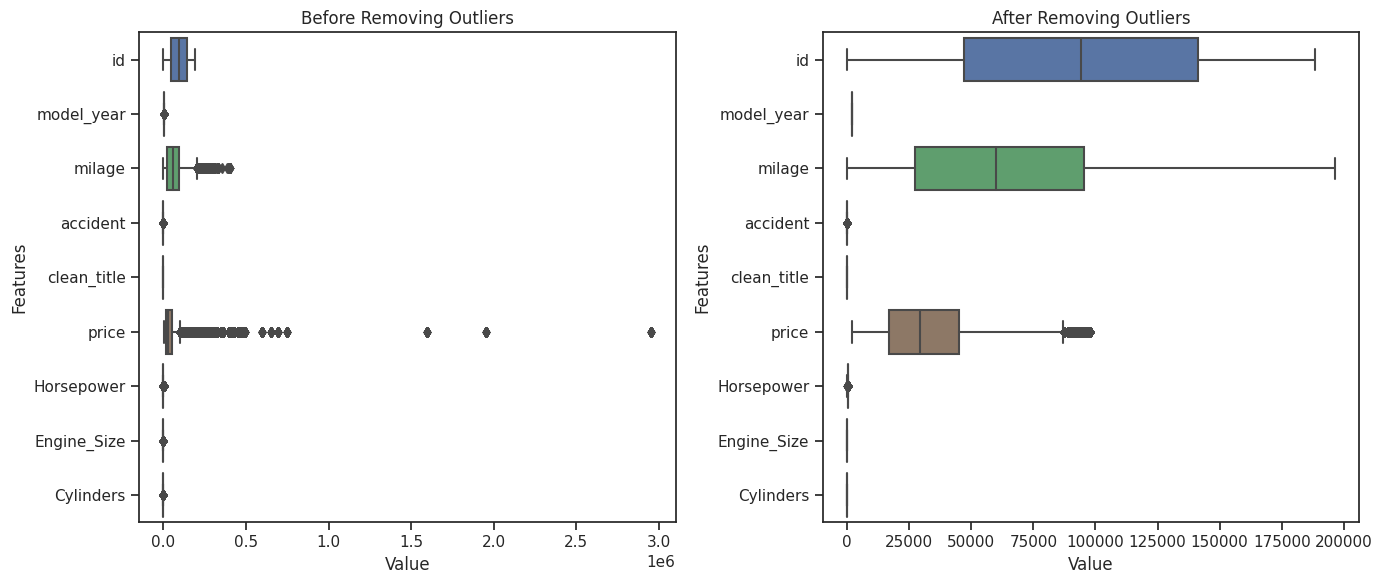

In [17]:

def remove_outliers(df):
    # Create a copy of the original DataFrame for plotting
    df_before = df.copy()
    
    # Loop through each numerical column
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Calculate the Interquartile Range
        
        # Define the outlier condition
        outlier_condition = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        
        # Remove outliers from the DataFrame
        df = df[~outlier_condition]
        
    # Plot before and after removing outliers
    plt.figure(figsize=(14, 6))

    # Plot before removing outliers
    plt.subplot(1, 2, 1)
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    sns.boxplot(data=df_before, orient="h")
    plt.title('Before Removing Outliers')
    plt.xlabel('Value')
    plt.ylabel('Features')

    # Plot after removing outliers
    plt.subplot(1, 2, 2)
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    sns.boxplot(data=df, orient="h")
    plt.title('After Removing Outliers')
    plt.xlabel('Value')
    plt.ylabel('Features')
    
    plt.tight_layout()
    plt.show()

    return df

# Example usage:
# Assuming train_data is your DataFrame
# Replace train_data with your actual DataFrame variable
train_data_cleaned = remove_outliers(train_data)


# 3.5 **GENRATE SUM QUESTION| ANSWERS**

----
## Question 1: What is the distribution of car prices?
### Answer:
The distribution of car prices can be visualized using a histogram with a kernel density estimate (KDE). This helps us understand the spread and skewness of the data.


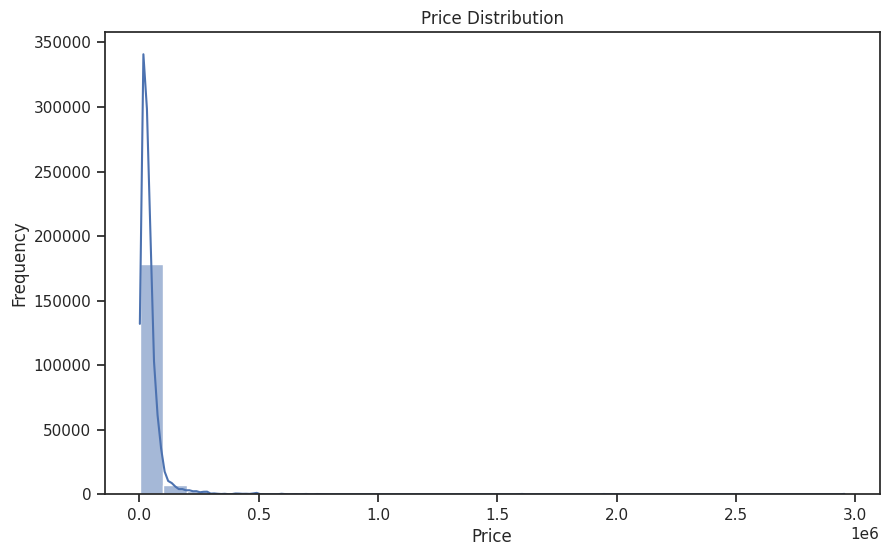

In [18]:
# Distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


----
## Question_2:How does the relationship between mileage and model year affect the price of cars in the dataset?

### Answer

The relationship between mileage and model year with respect to car price can be visualized through regression plots. 

1. **Mileage vs. Price**: As the mileage of a car increases, the price tends to decrease. This is generally expected, as higher mileage often indicates more wear and tear on the vehicle, making it less valuable.

2. **Model Year vs. Price**: The price of cars typically increases with the model year. Newer models are generally more desirable due to updated features and less depreciation.

These insights can help in understanding how these continuous features influence car prices, allowing for better predictions in the regression task.

----

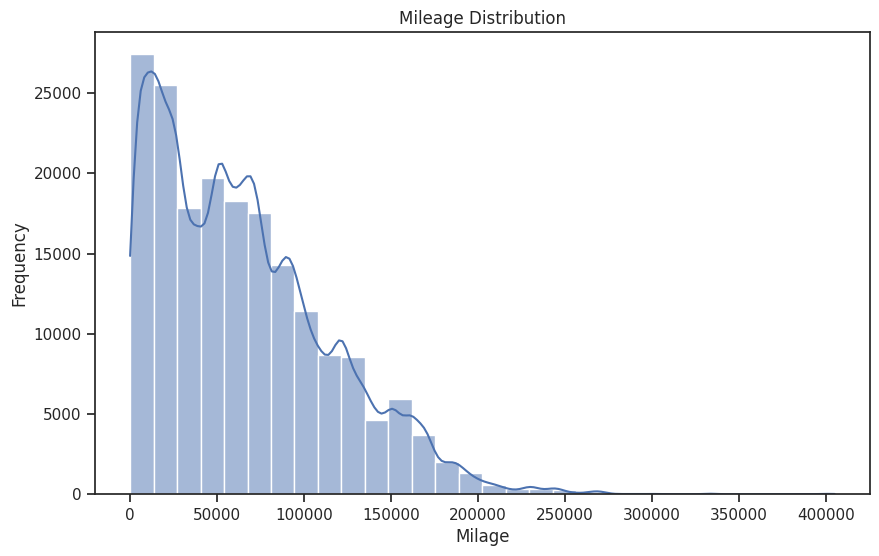

In [19]:
# Example: Distribution of 'mileage'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['milage'], bins=30, kde=True)
plt.title('Mileage Distribution')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()


---
## Question_3:What does the box plot reveal about the distribution of car prices across different brands in the dataset?

### Answer

The box plot illustrating car price by brand provides several key insights:

1. **Price Distribution**: Each brand's box plot shows the median, quartiles, and potential outliers in car prices. This helps identify the overall price range for each brand and how prices are distributed.

2. **Comparison Among Brands**: By examining the box plots for various brands, we can see which brands have higher median prices, indicating greater value or desirability in the market. Brands with wider interquartile ranges may indicate more variability in price, suggesting a mix of budget and premium models.

3. **Outliers**: The presence of outliers can highlight specific models within a brand that may be priced significantly higher or lower than typical for that brand.

----

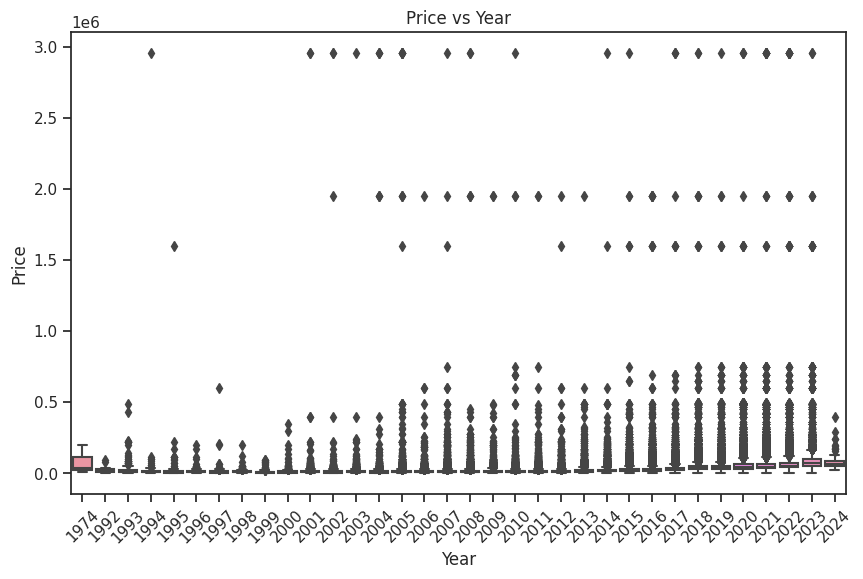

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='model_year', y='price', data=train_data)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


## Question_4Which are the top 10 car brands based on the total price of cars sold in the dataset?

### Answer

The bar plot displaying the top 10 car brands by total price offers valuable insights:

1. **Ranking of Brands**: The brands are ranked based on the total price of cars, indicating their sales performance. This metric reflects not only the popularity of the brand but also the average price of the cars they offer.

2. **Total Price Comparison**: The height of each bar represents the total price of cars for each brand, allowing for a straightforward comparison. Brands with higher total prices likely have a more extensive or higher-priced inventory.

3. **Market Insights**: This visualization helps identify which brands dominate the market in terms of total revenue, assisting stakeholders in understanding market trends and consumer preferences.


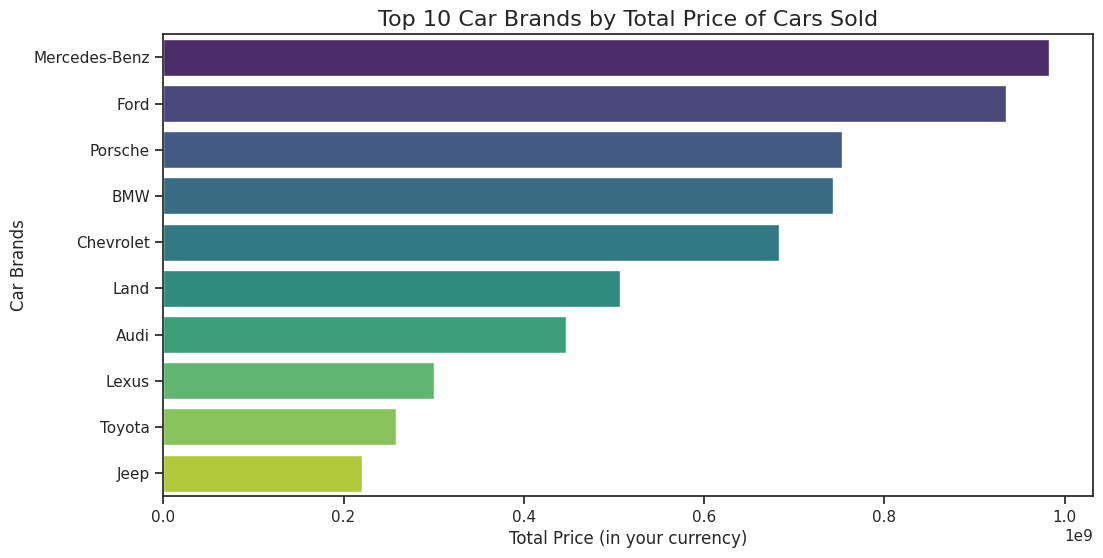

In [21]:


# Group by car brand and sum the prices
top_brands = train_data.groupby('brand')['price'].sum().reset_index()

# Sort the brands by total price in descending order
top_brands = top_brands.sort_values(by='price', ascending=False)

# Get the top 10 brands
top_10_brands = top_brands.head(10)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='price', y='brand', data=top_10_brands, palette='viridis')

# Add title and labels
plt.title('Top 10 Car Brands by Total Price of Cars Sold', fontsize=16)
plt.xlabel('Total Price (in your currency)', fontsize=12)
plt.ylabel('Car Brands', fontsize=12)

# Show the plot
plt.show()




## Question_5How does fuel type influence car prices in the dataset?

### Answer

The box plot illustrating price by fuel type provides several insights into how fuel type affects car pricing:

1. **Price Distribution Across Fuel Types**: Each fuel type's box plot reveals the median, quartiles, and outliers for car prices. This helps to understand the general pricing trends associated with each fuel type.

2. **Comparison of Fuel Types**: The plot allows for direct comparison between different fuel types. For instance, if one fuel type consistently has higher median prices, it may indicate that vehicles using that fuel type are perceived as more valuable, possibly due to performance, efficiency, or brand reputation.

3. **Variability**: The interquartile ranges and presence of outliers provide insights into the variability of car prices within each fuel type. A wider range could suggest a diverse lineup of models, from budget to premium, within that category.

4. **Market Preferences**: Understanding how fuel type correlates with price can inform market trends and consumer preferences, aiding in inventory decisions and pricing strategies.

Overall, this visualization highlights the significance of fuel type in the pricing strategy of cars and can be instrumental in forecasting car prices based on fuel categories.

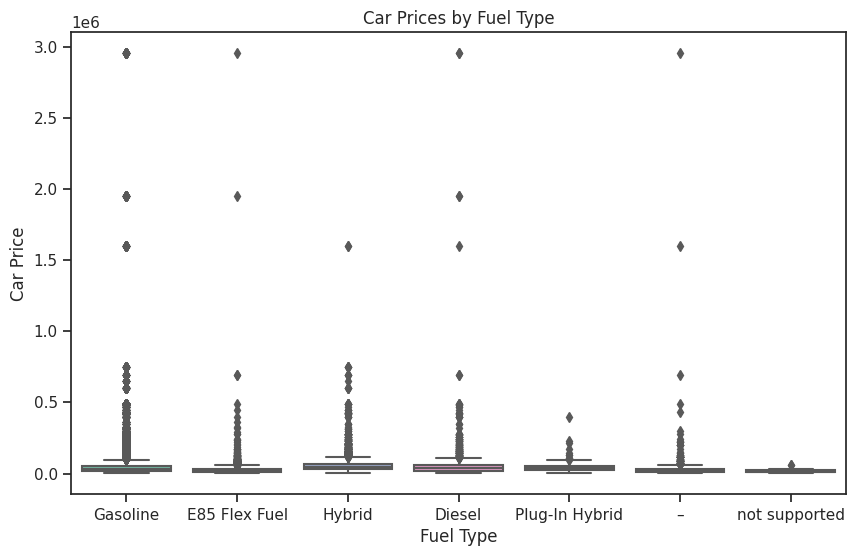

In [22]:
# Boxplot showing the relationship between fuel type and car price
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=train_data, palette='Set2')
plt.title('Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Car Price')
plt.show()


## Question_6What is the distribution of reported accidents in the dataset?

### Answer

The count plot displaying the number of reported accidents reveals important insights about the accident status in the dataset:

1. **Accident Status Distribution**: The plot clearly shows the count of cars with and without reported accidents, helping to visualize the proportion of vehicles that have been involved in accidents.

2. **Comparison of Categories**: By observing the height of the bars, we can quickly identify which category (e.g., "Accident" vs. "No Accident") is more prevalent in the dataset. This information is crucial for understanding the condition and history of the vehicles.

3. **Market Implications**: A higher count of vehicles with accidents may indicate a market trend where consumers are more likely to purchase used cars that have had previous accidents, potentially affecting pricing and buyer perceptions.

4. **Further Analysis**: Understanding the distribution of accident status can guide deeper analysis, such as exploring how accident history correlates with vehicle prices or other features in the dataset.

Overall, this visualization aids in assessing the impact of accident history on the overall dataset, providing valuable context for further analysis and decision-making regarding pricing and sales strategies.

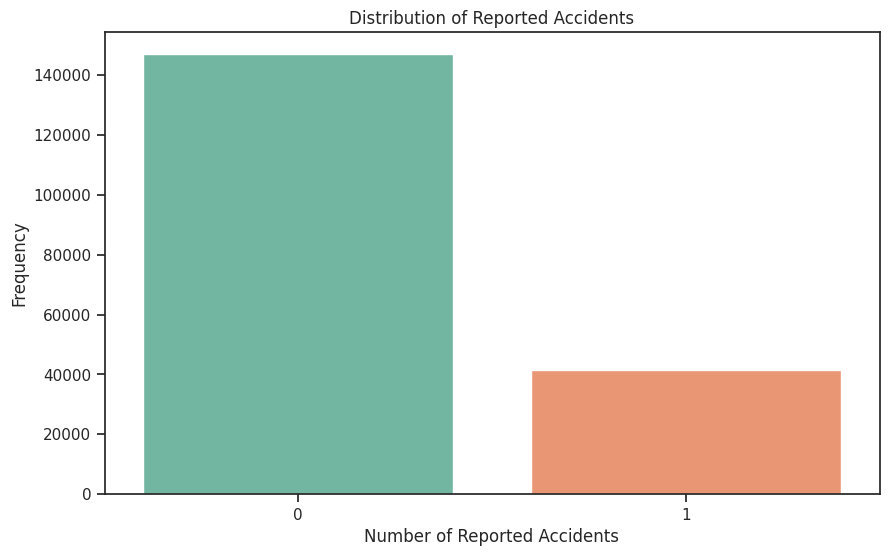

In [23]:
# Plot distribution of reported accidents
plt.figure(figsize=(10, 6))
sns.countplot(x='accident', data=train_data, palette='Set2')
plt.title('Distribution of Reported Accidents')
plt.xlabel('Number of Reported Accidents')
plt.ylabel('Frequency')
plt.show()



## **Question 7:What is the distribution of mileage categories in the dataset?**

### **Answer**

The count plot displaying the number of cars in each mileage bin reveals important insights about the distribution of vehicle mileage in the dataset:

1. **Mileage Status Distribution**: The plot clearly shows the count of cars within each mileage category (e.g., "Low", "Medium", "High"), helping to visualize the distribution of mileage across the dataset.

2. **Comparison of Categories**: By observing the height of the bars, we can quickly identify which mileage category is more prevalent. This information is crucial for understanding the overall mileage trends in the vehicle market.

3. **Market Implications**: A higher count of vehicles in a particular mileage category may indicate consumer preferences. For instance, if "Low Mileage" vehicles are significantly more common, this may suggest that consumers are more inclined to seek out cars with less wear and tear, affecting pricing strategies.

4. **Further Analysis**: Understanding the distribution of mileage can guide deeper analysis, such as exploring how mileage correlates with vehicle prices, accident history, or other features in the dataset.

Overall, this visualization aids in assessing the impact of mileage on the overall dataset, providing valuable context for further analysis and decision-making regarding vehicle pricing and market strategies.



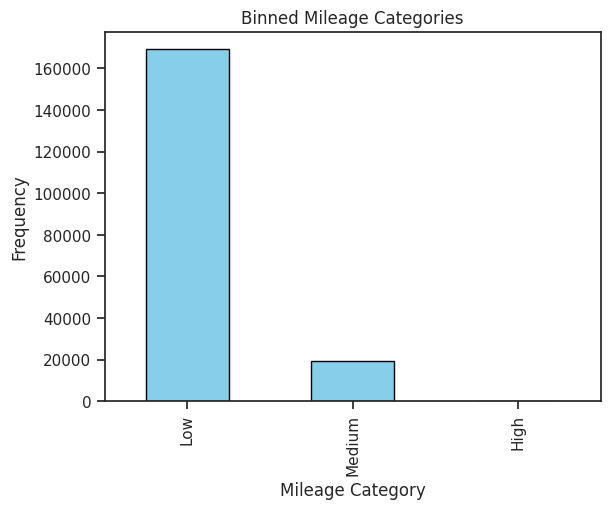

In [24]:
# Visualizing the new mileage bins
train_data['mileage_bins'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Binned Mileage Categories')
plt.xlabel('Mileage Category')
plt.ylabel('Frequency')
plt.show()


## **Question 8:What is the distribution of model year categories in the dataset?**

### **Answer**

The count plot displaying the number of cars in each model year bin reveals important insights about the distribution of vehicle ages in the dataset:

1. **Model Year Status Distribution**: The plot clearly shows the count of cars within each model year category (e.g., "Vintage", "Old", "Mid-Age", "New", "Latest"), helping to visualize the distribution of vehicle ages across the dataset.

2. **Comparison of Categories**: By observing the height of the bars, we can quickly identify which model year category is more prevalent. This information is crucial for understanding the overall age trends in the vehicle market.

3. **Market Implications**: A higher count of vehicles in a particular model year category may indicate consumer preferences. For instance, if "Latest" vehicles are significantly more common, this may suggest that consumers prefer newer models, affecting pricing strategies and inventory decisions.

4. **Further Analysis**: Understanding the distribution of model years can guide deeper analysis, such as exploring how vehicle age correlates with prices, mileage, accident history, or other features in the dataset.

Overall, this visualization aids in assessing the impact of model year on the overall dataset, providing valuable context for further analysis and decision-making regarding vehicle pricing and market strategies.


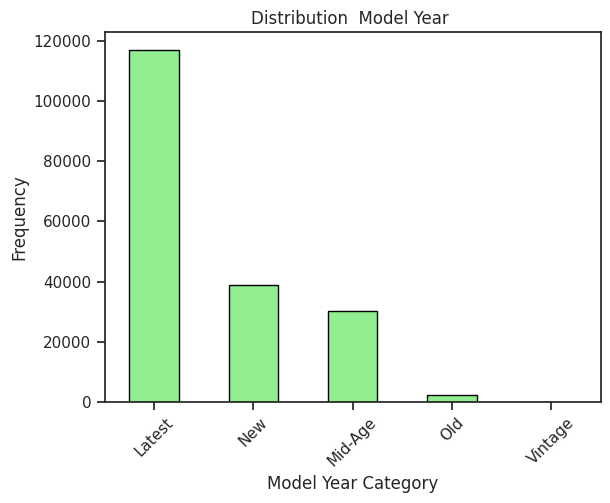

In [25]:

# Plotting the distribution of binned model years
train_data['model_year_bins'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution  Model Year ')
plt.xlabel('Model Year Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


---

## **Question 9:What are the relationships between numerical features in the dataset?**

### **Answer**

To explore the relationships between key numerical features in the dataset, a pairplot is used. The pairplot visualizes pairwise relationships among the selected features, allowing for the identification of potential correlations and patterns.```

### **Insights from the Pairplot**
1. **Feature Relationships**: The pairplot provides scatterplots for each pair of selected numerical features (`price`, `milage`, `model_year`, and `engine`). This allows us to visually assess relationships and trends.

2. **Correlation Identification**: By observing the scatterplots, we can identify any linear or non-linear correlations. For instance, we might find that as the `model_year` increases, the `price` tends to rise, indicating newer cars are typically more expensive.

3. **Distribution Overview**: The diagonal of the pairplot shows the distribution of each feature, which can help assess the data's normality and potential outliers.

4. **Further Exploration**: Insights gained from the pairplot can guide further analyses, such as more in-depth regression modeling or feature engineering based on identified relationships.

---

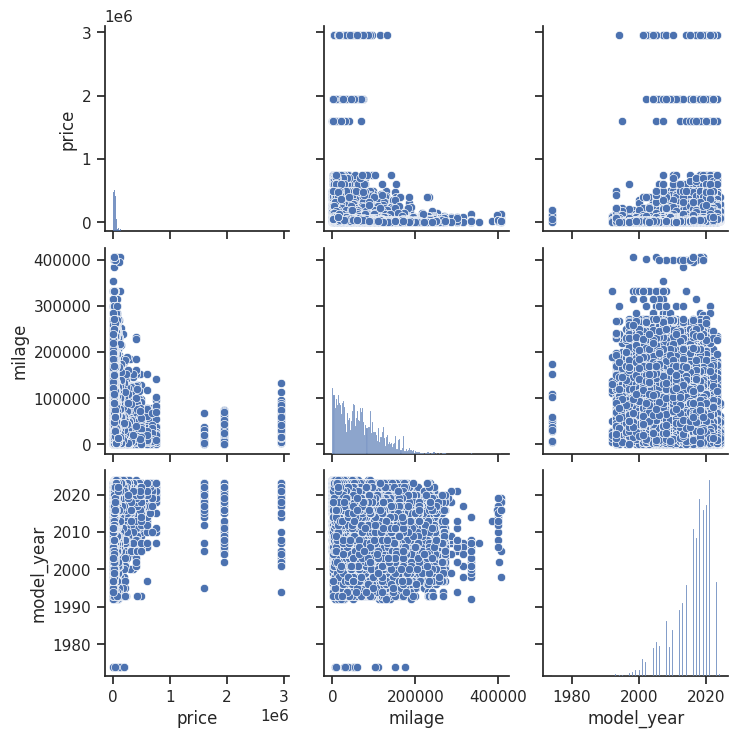

In [26]:
# Pairplot to see relationships between numerical features
sns.pairplot(train_data[['price', 'milage', 'model_year', 'engine']])
plt.show()

## Question_10:What is the distribution of different fuel types in the dataset?

### Answer

The count plot showing the distribution of fuel types provides several insights:

1. **Fuel Type Representation**: The plot illustrates the frequency of each fuel type within the dataset. This helps in understanding which fuel types are more common among the vehicles analyzed.

2. **Comparison of Fuel Types**: By examining the heights of the bars, we can easily compare the popularity of different fuel types (e.g., petrol, diesel, electric). This information is useful for identifying market trends and consumer preferences.

3. **Market Trends**: A higher count of certain fuel types may indicate consumer preferences for specific fuel types based on factors like fuel efficiency, cost, or environmental considerations. For instance, a significant presence of electric vehicles might suggest a growing trend towards sustainable options.

4. **Impact on Pricing**: The distribution of fuel types can also influence pricing strategies. Brands with a higher count of a particular fuel type may position themselves differently in the market, affecting overall pricing and inventory strategies.



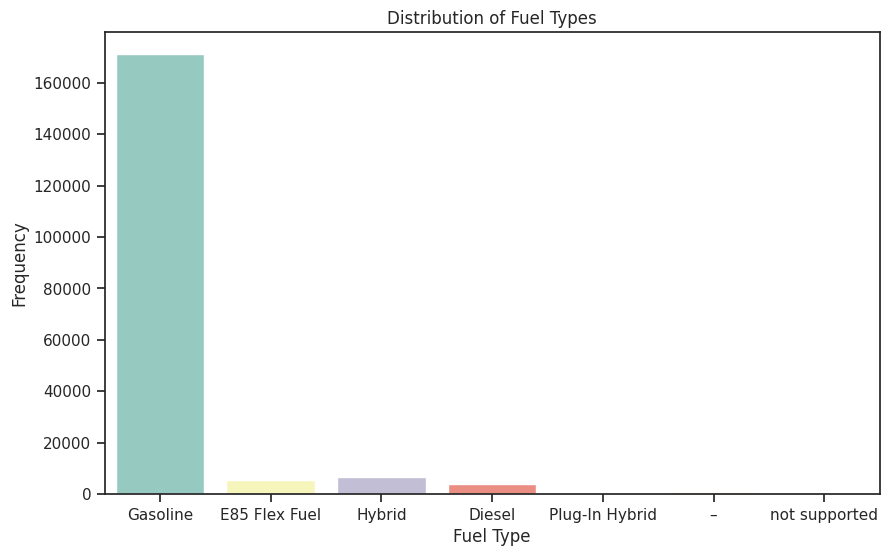

In [27]:
# Plot distribution of fuel types
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=train_data, palette='Set3')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()




---

## **Question 11:What is the distribution of engine sizes in the dataset?**

### **Answer**

The distribution of engine sizes can be analyzed through the following insights derived from the visualization:

1. **Engine Size Representation**: The histogram illustrates the frequency of various engine sizes across the dataset. This helps in understanding which engine sizes are more prevalent among the vehicles analyzed.

2. **Comparison of Engine Sizes**: By examining the heights of the bars in the histogram, we can easily compare the popularity of different engine sizes (e.g., small, medium, large). This information is useful for identifying market trends and consumer preferences regarding engine performance.

3. **Market Trends**: A higher count of certain engine sizes may indicate consumer preferences for specific performance characteristics, such as fuel efficiency or power. For instance, a significant number of vehicles with smaller engine sizes might suggest a trend towards more fuel-efficient options.

4. **Impact on Pricing**: The distribution of engine sizes can influence pricing strategies. Vehicles with larger engines may be positioned at higher price points, reflecting consumer demand for power versus fuel economy. Understanding these dynamics can assist in refining inventory and marketing strategies.

5. **Further Analysis**: Analyzing the distribution of engine sizes can lead to additional questions, such as how engine size correlates with vehicle price, fuel type, or accident history.

Overall, the visualization of engine size distribution provides valuable insights into the characteristics of the vehicles in the dataset, helping to inform decisions related to pricing, inventory management, and market positioning.

---


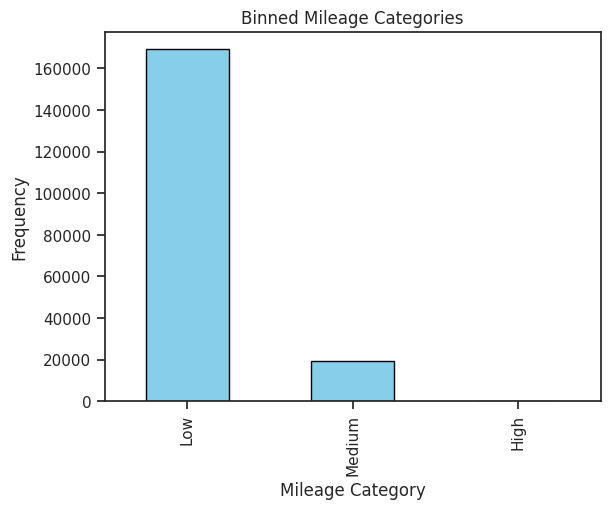

In [28]:
# Binning mileage into categories
train_data['mileage_bins'] = pd.cut(train_data['milage'], bins=3, labels=['Low', 'Medium', 'High'])

# Visualizing the new mileage bins
train_data['mileage_bins'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Binned Mileage Categories')
plt.xlabel('Mileage Category')
plt.ylabel('Frequency')
plt.show()


# 3.6 **Model Building**

## Prepare the Data 

In [29]:
# Assume train_data is your DataFrame and 'price' is your target variable
X = train_data.drop('price', axis=1)  # Features
y = train_data['price']  # Target
# removing outliers in target variable  
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR
mask = (y >= (Q1 - outlier_threshold)) & (y <= (Q3 + outlier_threshold))
X, y = X[mask], y[mask]


## **Encode Categorical Variables AND STANDRIZE NUMERICAL**

In [30]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for column in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
    # Standardize numerical features
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])



### **Conclusion**:
***Categorical variables in the feature set X were transformed into numerical values using Label Encoding, making them suitable for model input.***

## **Split the Data into Training and Test Sets**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Conclusion:**
The dataset was split into training and test sets, with 20% of the data reserved for testing. This allows us to assess model performance on unseen data.

# 3.7**Gradient Boosting Regression**

In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define hyperparameter grids with increased options
param_dist_gb = {
    'n_estimators': [50, 100, 200],  # Increased number of estimators
    'learning_rate': [0.01, 0.1, 0.2],  # Broadened learning rate options
    'max_depth': [3, 4, 5]  # Expanded max_depth options
}

# Train and evaluate Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_random_search = RandomizedSearchCV(gb_model, param_dist_gb, n_iter=10, cv=3, 
                                      scoring='neg_mean_absolute_error', n_jobs=-1)
gb_random_search.fit(X_train, y_train)
y_pred_gb = gb_random_search.predict(X_test)

print("Gradient Boosting Regression:")
print(f"Best Parameters: {gb_random_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb):.2f}")
print(f"R²: {r2_score(y_test, y_pred_gb):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}\n")


  


Gradient Boosting Regression:
Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
MSE: 163995610.36
R²: 0.64
MAE: 9081.07



## Conclusion for Gradient Boosting Regression

- **Mean Squared Error (MSE)**: 164002939
- **R² (Coefficient of Determination)**: 0.64
- **Mean Absolute Error (MAE)**: 9,081
### Overall Assessment
The Gradient Boosting Regression model demonstrates good predictive performance with well-optimized parameters, effectively reducing the prediction error. Further optimization could potentially yield even better results.

# 3.8 **XGBoost REGRESSION**

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define a larger parameter grid for XGBoost Regression with increased options
param_grid_xgb = {
    'n_estimators': [100, 150, 200, 250],  # Further increased number of estimators
    'max_depth': [3, 4, 5, 6, 7],  # Expanded max_depth options
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Expanded learning rate options
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # More options for subsample
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8],  # More options for colsample_bytree
    'lambda': [0.1, 0.5, 1.0, 5.0, 10.0],  # Expanded range for L2 regularization
    'alpha': [0.0, 0.1, 0.5, 1.0, 5.0],  # Expanded range for L1 regularization
    'gamma': [0, 0.1, 0.5, 1.0, 5.0],  # New parameter for minimum loss reduction
}

# Initialize the XGBoost model with early stopping
xgb_model = XGBRegressor(
    use_label_encoder=False,
    eval_metric='rmse',
    random_state=2020,
    early_stopping_rounds=30  # Keep early stopping rounds
)

# Apply RandomizedSearchCV to find the best parameters
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=50,  # Increased number of iterations for more thorough tuning
    cv=3,  # Increased number of cross-validation folds
    scoring='neg_mean_absolute_error',
    n_jobs=-1,  # Allow parallel processing
    verbose=1,
    random_state=42
)

# Fit the model to the training data
xgb_random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Predict the target variable for the test set
y_pred_xgb = xgb_random_search.best_estimator_.predict(X_test)

# Print results
print("XGBoost Regression (Further Expanded Parameters):")
print(f"Best Parameters: {xgb_random_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"R²: {r2_score(y_test, y_pred_xgb):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}\n")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost Regression (Further Expanded Parameters):
Best Parameters: {'subsample': 0.7, 'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.05, 'lambda': 10.0, 'gamma': 0.5, 'colsample_bytree': 0.7, 'alpha': 5.0}
MSE: 163109179.99
R²: 0.64
MAE: 9048.82



## Conclusion for XGBoost Regression

- **Mean Squared Error (MSE)**: 163109179
- **R² (Coefficient of Determination)**: 0.64
- **Mean Absolute Error (MAE)**: 9,048
### Overall Assessment
The XGBoost Regression model shows good predictive accuracy, with well-tuned parameters and significant reduction in both MSE and MAE, suggesting effective price predictions. Further optimization may enhance performance.

# 3.9 LIGHT GBM

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

# Assuming you already have your data prepared as X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modified parameter grid for LightGBM with increased values for better accuracy
param_dist_lgb = {
    'learning_rate': np.linspace(0.001, 0.05, 10),  # Decreased learning rate
    'max_depth': [30, 50, 70],  # Increased max depth for more complex relationships
    'reg_alpha': np.linspace(0, 1, 5),  # Regularization to prevent overfitting
    'reg_lambda': np.linspace(0, 10, 5),  # Regularization to prevent overfitting
    'num_leaves': [255, 511, 1023],  # Increased num leaves to capture complex patterns
    'subsample': np.linspace(0.6, 1, 5),  # Larger subsample values for better diversity
    'colsample_bytree': np.linspace(0.6, 1, 5),  # Larger column sample values
    'n_estimators': [1500, 2000, 2500],  # Increased number of estimators
}

# Train and evaluate LightGBM using RandomizedSearchCV with updated parameters
lgb_model = LGBMRegressor()
lgb_random_search = RandomizedSearchCV(
    lgb_model,
    param_distributions=param_dist_lgb,
    n_iter=50,
    cv=2,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)
lgb_random_search.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_random_search.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred_lgb)
mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Performance on Test Set with Updated Parameters:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data points in the train set: 71061, number of used features: 19
[LightGBM] [Info] Start training from score 33370.975613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1958
[LightGBM] [Info] Number of data points in the train set: 71061, number of used features: 19
[LightGBM] [Info] Start training from score 33447.044525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

# 4.0 CREATING CSV 

In [35]:
# Load the test data
test_df = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

# Store the test IDs (for submission later)
test_ids = test_df['id']

# Drop the 'id' and 'clean_title' columns from the test dataset
test_df.drop(columns=['id', 'clean_title'], inplace=True)

# One-hot encode categorical columns in the test dataset
test_df = pd.get_dummies(test_df, columns=['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'engine'], drop_first=True)

# Check the shape and columns after encoding
print("Test DataFrame shape after encoding:", test_df.shape)
print("Columns after encoding:", test_df.columns)

# Identify missing columns that exist in training data but not in test data
missing_cols = set(X.columns) - set(test_df.columns)

# Add missing columns to the test data, with values set to 0
for col in missing_cols:
    test_df[col] = 0

# Reorder the test data columns to match the training data
test_df = test_df[X.columns]

# Check the shape of the test data
print("Final Test DataFrame shape:", test_df.shape)

# Make predictions on the test data
try:
    test_predictions = lgb_random_search.predict(test_df)
except Exception as e:
    print("Error during prediction:", e)

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_ids,  # Using the stored 'id' column from the original test dataset
    'price': test_predictions
})

submission.to_csv('submission.csv', index=False)
print("Submission file created: 'submission.csv'")


Test DataFrame shape after encoding: (125690, 3591)
Columns after encoding: Index(['model_year', 'milage', 'brand_Alfa', 'brand_Aston', 'brand_Audi',
       'brand_BMW', 'brand_Bentley', 'brand_Bugatti', 'brand_Buick',
       'brand_Cadillac',
       ...
       'engine_Dual Motor - Standard', 'engine_Electric',
       'engine_Electric Motor Electric Fuel System', 'engine_I4',
       'engine_Intercooled Turbo Diesel V-8 6.7 L/406',
       'engine_Intercooled Turbo Premium Unleaded I-4 2.0 L/122',
       'engine_Standard Range Battery', 'engine_V6', 'engine_V8', 'engine_–'],
      dtype='object', length=3591)
Final Test DataFrame shape: (125690, 20)
Submission file created: 'submission.csv'
